# Assignment 2: recommender System

## Code from the lecture

In [236]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [237]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [238]:
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [239]:
#again, implementation not efficient: better use lamda opperators 
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D[i,j]=CosineDist(R[:,i],R[:,j])

In [5]:
def getTopN(movie_id,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$


## Lösung Aufgabe 4.1

In [49]:
#Eucledian Distance

def EucledianDist(a,b):
    return np.linalg.norm(b-a)

def getTopN_EUC(movie_id,N=5):
    return Deuc[movie_id,:].argsort()[-N:]

def CII_EUC(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN_EUC(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")



In [50]:
CII_EUC("Star")

recommending movies for: 'Star Wars (1977)'


989              Anna Karenina (1997)
1061    Four Days in September (1997)
1126          Truman Show, The (1998)
937        Smile Like Yours, A (1997)
1242               Night Flier (1997)
Name: title, dtype: object

In [27]:
CII("Star")

recommending movies for: 'Star Wars (1977)'


989              Anna Karenina (1997)
1061    Four Days in September (1997)
1126          Truman Show, The (1998)
937        Smile Like Yours, A (1997)
1242               Night Flier (1997)
Name: title, dtype: object

In [15]:
#Matrix Eucledian Distance Deuc erzeugen

Deuc=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            Deuc[i,j]=EucledianDist(R[:,i],R[:,j])

In [22]:
#Testdaten für R_train und R_test

from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)

D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=EucledianDist(R_train[:,i],R_train[:,j])

In [30]:
#Methode Score_byID_EUC erweitern, sodass Zugriff via getTopN_EUC erfolgt

def Score_byID_EUC(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN_EUC(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID_EUC(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [54]:
np.argsort(R_test[23])[-5:]
#test_res=test_Score(D_train,R_test)

array([  44, 1295,  241,  169,  301], dtype=int64)

In [59]:
Score_byID_EUC(326,D_train, R_test[23])
#Deuc[326,:].argsort()[-5:]

TypeError: only integer scalar arrays can be converted to a scalar index

## Lösung Aufgabe 4.2

In [240]:
#Methode zur Berechnung der durchschnittlichen Bewertungen
def Average_Movie_Ratings(rating):
    #Array definieren
    movieRating= np.zeros((rating.values[:,1].max()-1, 2))
    #movieRating = dict()
    for i in range(rating.values[:,1].max()):
        movie_id_rating = ratings.values[:,1:3]
        mask = (movie_id_rating[:,0] == i)
        
        if movie_id[mask].shape[0] != 0:
            tempRating = movie_id[mask]
            #movieRating[i]= np.array([i,np.mean(tempRating[:,1])])
            movieRating[i-1]= (i,np.mean(tempRating[:,1]))
    return movieRating

def getTopN_Average_Movie(rating, N=5):
    
    # Frage - Wie Sortierung?
    
    return Average_Movie_Ratings(rating).argsort()[-N:]
    

#Durchschnittliches Rating der Filme
getTopN_Average_Movie(ratings)


array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int64)

In [232]:
#Zufällger Film

def get_ZufallID_Movie(movies):
    return np.random.randint(1,movies.shape[0])

#Aufruf
getNameByID(get_ZufallID_Movie(movies))

'Ghost and the Darkness, The (1996)'

## Lösung Aufgabe 4.3

In [233]:
#Sigulärwertzwerlegung

#D anzeigen
D
#np.shape(D)

array([[0.        , 0.40238218, 0.33024479, ..., 0.        , 0.04718307,
        0.04718307],
       [0.40238218, 0.        , 0.27306918, ..., 0.        , 0.07829936,
        0.07829936],
       [0.33024479, 0.27306918, 0.        , ..., 0.        , 0.        ,
        0.09687505],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04718307, 0.07829936, 0.09687505, ..., 0.        , 0.        ,
        0.        ]])

In [62]:
U,S,V = np.linalg.svd(D)

In [63]:
#U anzeigen
U

array([[-0.04732606,  0.01485397, -0.01710692, ...,  0.03320633,
         0.07709852, -0.02683127],
       [-0.0442046 ,  0.02817456,  0.00874024, ..., -0.01037845,
         0.02276745, -0.01173597],
       [-0.03099178,  0.01538773,  0.00099614, ...,  0.01075307,
         0.03056101,  0.02053746],
       ...,
       [-0.00086959, -0.00484583,  0.00268401, ...,  0.00168333,
         0.00644098,  0.00680988],
       [-0.00516609,  0.00164718, -0.00114115, ...,  0.01203374,
         0.01327531,  0.00629676],
       [-0.00501757, -0.00051215, -0.00370972, ...,  0.0316123 ,
         0.00433746,  0.01458175]])

In [64]:
#S anzeigen
S

array([1.92975815e+02, 5.07954113e+01, 4.48492807e+01, ...,
       4.84719748e-03, 3.25223849e-03, 8.77126921e-05])

In [65]:
#V anzeigen
V

array([[-0.04732606, -0.0442046 , -0.03099178, ..., -0.00086959,
        -0.00516609, -0.00501757],
       [ 0.01485397,  0.02817456,  0.01538773, ..., -0.00484583,
         0.00164718, -0.00051215],
       [-0.01710692,  0.00874024,  0.00099614, ...,  0.00268401,
        -0.00114115, -0.00370972],
       ...,
       [-0.03320633,  0.01037845, -0.01075307, ..., -0.00168333,
        -0.01203374, -0.0316123 ],
       [ 0.07709852,  0.02276745,  0.03056101, ...,  0.00644098,
         0.01327531,  0.00433746],
       [ 0.02683127,  0.01173597, -0.02053746, ..., -0.00680988,
        -0.00629676, -0.01458175]])

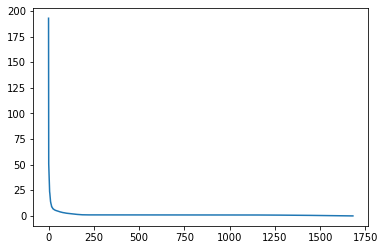

In [66]:
fig, ax = plt.subplots()

# Frage - Wie Plot?

ax.plot(S)

In [235]:
#Reconstruct

np.dot(U*S,V)

array([[-5.74453679e-15,  4.02382178e-01,  3.30244787e-01, ...,
        -1.04096961e-15,  4.71830671e-02,  4.71830671e-02],
       [ 4.02382178e-01,  2.05096357e-14,  2.73069175e-01, ...,
         2.46547574e-16,  7.82993626e-02,  7.82993626e-02],
       [ 3.30244787e-01,  2.73069175e-01, -9.08041004e-15, ...,
        -3.18755439e-16, -6.09863722e-16,  9.68750526e-02],
       ...,
       [ 2.89942766e-16, -5.29090660e-17, -4.79434201e-16, ...,
         8.86552116e-16, -2.50992803e-16, -5.19332841e-17],
       [ 4.71830671e-02,  7.82993626e-02, -4.70869004e-16, ...,
         1.93855348e-16,  8.29848343e-16, -1.79327039e-16],
       [ 4.71830671e-02,  7.82993626e-02,  9.68750526e-02, ...,
        -1.23815888e-16, -9.45424294e-17, -1.42464165e-16]])